## Cointegration

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [7]:
ko = pd.read_csv("data/ko-1970-2015.csv")
pep = pd.read_csv("data/pep-1970-2015.csv")

In [8]:
ko.head()

,PERMNO,date,TICKER,PRC
0,11308,19700102,KO,82.250
1,11308,19700105,KO,81.000
2,11308,19700106,KO,81.750
3,11308,19700107,KO,82.250
4,11308,19700108,KO,82.375


In [9]:
ko.tail()

,PERMNO,date,TICKER,PRC
11602,11308,20151224,KO,43.54
11603,11308,20151228,KO,43.49
11604,11308,20151229,KO,43.71
11605,11308,20151230,KO,43.57
11606,11308,20151231,KO,42.96


In [10]:
pep.head()

,PERMNO,date,TICKER,PRC
0,13856,19700102,PEP,52.500
1,13856,19700105,PEP,52.750
2,13856,19700106,PEP,52.000
3,13856,19700107,PEP,51.125
4,13856,19700108,PEP,49.625


In [11]:
pep.tail()

,PERMNO,date,TICKER,PRC
11602,13856,20151224,PEP,100.54
11603,13856,20151228,PEP,100.68
11604,13856,20151229,PEP,101.45
11605,13856,20151230,PEP,101.15
11606,13856,20151231,PEP,99.92


In [15]:
pep.iloc[-252:]

,PERMNO,date,TICKER,PRC
11355,13856,20150102,PEP,94.44
11356,13856,20150105,PEP,93.73
11357,13856,20150106,PEP,93.02
11358,13856,20150107,PEP,95.74
11359,13856,20150108,PEP,97.48
...,...,...,...,...
11602,13856,20151224,PEP,100.54
11603,13856,20151228,PEP,100.68
11604,13856,20151229,PEP,101.45
11605,13856,20151230,PEP,101.15


In [17]:
ko.iloc[-252:]

,PERMNO,date,TICKER,PRC
11355,11308,20150102,KO,42.14
11356,11308,20150105,KO,42.14
11357,11308,20150106,KO,42.46
11358,11308,20150107,KO,42.99
11359,11308,20150108,KO,43.51
...,...,...,...,...
11602,11308,20151224,KO,43.54
11603,11308,20151228,KO,43.49
11604,11308,20151229,KO,43.71
11605,11308,20151230,KO,43.57


<AxesSubplot:>

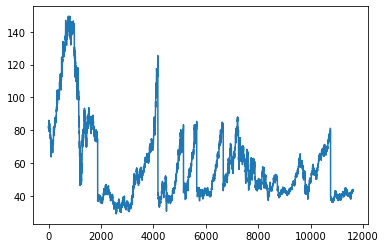

In [29]:
ko.PRC.plot()

<AxesSubplot:>

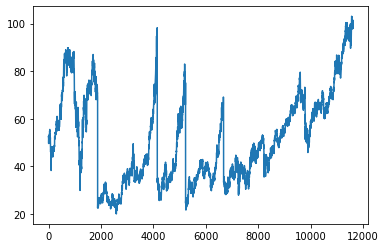

In [30]:
pep.PRC.plot()

In [18]:
df = pd.DataFrame({'ko': ko['PRC'].iloc[-252:], 'pep' : pep['PRC'].iloc[-252:]})

In [19]:
df.head()

,ko,pep
11355,42.14,94.44
11356,42.14,93.73
11357,42.46,93.02
11358,42.99,95.74
11359,43.51,97.48


<AxesSubplot:>

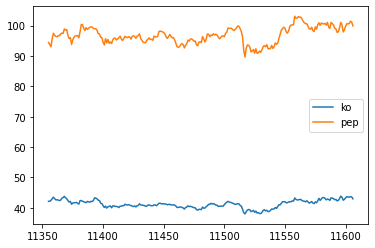

In [20]:
df.plot()

In [27]:
## Apply ADF test to prices

## Test KO in $levels
adf_results_ko = sm.tsa.stattools.adfuller(df.ko, maxlag=10)
adf_results_ko

(-2.1323029930212902,
 0.2317253026691189,
 0,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 207.53748348461312)

In [25]:
## Test PEP in $levels
adf_results_pep = sm.tsa.stattools.adfuller(df.pep, maxlag=10)

In [26]:
adf_results_pep

(-3.0506634806661572,
 0.03042636928534495,
 1,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 644.8353999669648)

In [31]:
## NEXT: confirm the same results in log-levels

In [32]:
ko_ret = np.diff(np.log(ko.PRC.values))
pep_ret = np.diff(np.log(pep.PRC.values))
df_ret = pd.DataFrame({'rko' : ko_ret, 'rpep' : pep_ret})

In [33]:
df_ret.head()

,rko,rpep
0,-0.015314,0.004751
1,0.009217,-0.014320
2,0.006098,-0.016970
3,0.001519,-0.029779
4,-0.004563,0.027331


<AxesSubplot:>

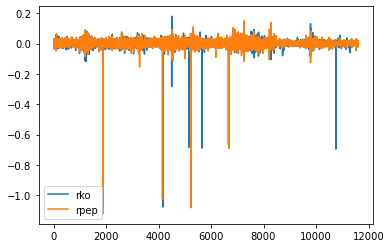

In [35]:
df_ret.plot()

In [36]:
## Rerun the ADF test for log-returns for KO
ko_ret_adf = sm.tsa.stattools.adfuller(df_ret.rko, maxlag=10)

In [38]:
## Big F test, small pval => reject (meaning: no unit-root nonstationarity)
ko_ret_adf

(-78.0624887771179,
 0.0,
 1,
 11604,
 {'1%': -3.4309136631471953,
  '5%': -2.8617891093736247,
  '10%': -2.566902595835203},
 -54487.93107422392)

In [40]:
## Rerun the ADF test for log-returns for PEP
pep_ret_adf = sm.tsa.stattools.adfuller(df_ret.rpep, maxlag=10)

In [41]:
pep_ret_adf

(-50.31924252049298,
 0.0,
 4,
 11601,
 {'1%': -3.4309138089418534,
  '5%': -2.861789173801056,
  '10%': -2.5669026301296696},
 -53453.15145068078)

In [45]:
## Run the Engle-Granger regression (NB: in this case pep on ko)
Y = np.log(df.pep.values)
X = np.log(df.ko.values)
X = sm.add_constant(X)

reg = sm.OLS(Y,X)
results = reg.fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     667.7
Date:                Mon, 11 Apr 2022   Prob (F-statistic):           1.49e-72
Time:                        09:47:56   Log-Likelihood:                 707.46
No. Observations:                 252   AIC:                            -1411.
Df Residuals:                     250   BIC:                            -1404.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7707      0.108     16.331      0.000       1.557       1.984
x1             0.7534      0.029     25.841      0.000       0.696       0.811
==============================================================================
Omnibus:                       18.742   Durbin-Watson:                   0.176
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.426
Skew:                          -0.440   Prob(JB):                     1.50e-07
Kurtosis:                       4.489   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
uhat = results.resid

In [58]:
## Run ADF on these residuals
coint_adf = sm.tsa.stattools.adfuller(uhat, maxlag=10)

In [59]:
coint_adf

(-4.651289951955719,
 0.00010379000659609667,
 2,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 -1794.3435435611527)

<AxesSubplot:>

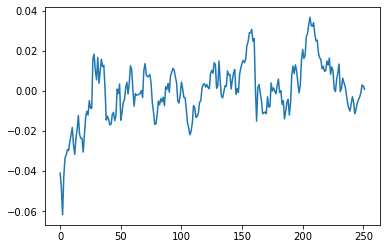

In [61]:
us = pd.Series(uhat)
us.plot()

In [60]:
## Big F stat, small pval => reject! Meaning that they are cointegrated!

In [52]:
## NB: rerun as ko ~ pep just to make sure

## Review of the Steps

1. Run ADF tests for each series individually
    - We expect that each will be unit-root processes
    - Meaning we should fail to reject at this stage for both
    - (They can't be cointegrated unless they are each separately integrated)
    
2. First difference each series and run the ADF test on the resulting series
    - We expect to reject at this stage
    - We need first-differencing to account for the individual unit-root behavior
    
3. Run the Engle-Granger regression
    - In this case we might expect KO to lead PEP
    - So regress PEP ~ KO
    - Grab the estimated residuals: uhat
    - Run the ADF test on uhat
    - If they are cointegrated we should reject!
4. Run the error-correction models